In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np


In [3]:
data = pd.read_csv("olympic_medals.csv")
data.head()


,Olympiad,Discipline,Event,Winner,Medal_type,Olympic_city,Olympic_year,Olympic_season,Gender,Code,Committee,Committee_type
0,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Men",Hermann Weingärtner,Gold,Athens,1896,summer,Men,GER,Germany,Country
1,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Men",Alfred Flatow,Silver,Athens,1896,summer,Men,GER,Germany,Country
2,Athina 1896,Artistic Gymnastics,"Horizontal Bar, Teams, Men",Germany,Gold,Athens,1896,summer,Men,GER,Germany,Country
3,Athina 1896,Artistic Gymnastics,"Horse Vault, Men",Hermann Weingärtner,Bronze,Athens,1896,summer,Men,GER,Germany,Country
4,Athina 1896,Artistic Gymnastics,"Horse Vault, Men",Carl Schuhmann,Gold,Athens,1896,summer,Men,GER,Germany,Country


In [4]:
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Olympiad        21477 non-null  object
 1   Discipline      21477 non-null  object
 2   Event           21477 non-null  object
 3   Winner          21477 non-null  object
 4   Medal_type      21477 non-null  object
 5   Olympic_city    21477 non-null  object
 6   Olympic_year    21477 non-null  int64 
 7   Olympic_season  21477 non-null  object
 8   Gender          21477 non-null  object
 9   Code            21477 non-null  object
 10  Committee       21477 non-null  object
 11  Committee_type  21477 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB
None
       Olympic_year
count  21477.000000
mean    1981.212739
std       34.248770
min     1896.000000
25%     1960.000000
50%     1992.000000
75%     2008.000000
max     2024.000000
Olympiad          0
Discipline        0

In [6]:
data = data.dropna(subset=['Medal_type'])


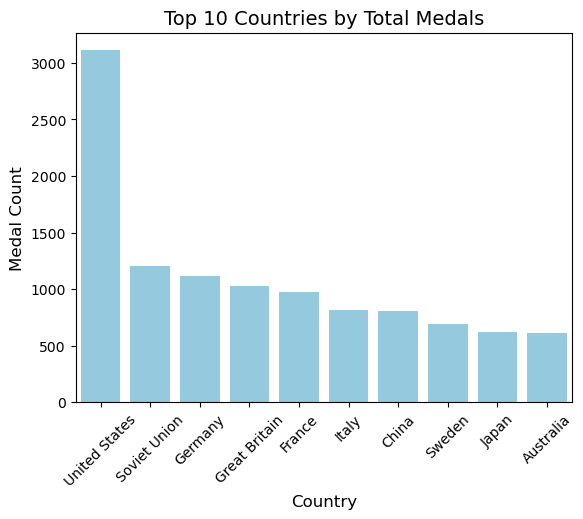

In [28]:
country_medals = data['Committee'].value_counts().head(10)

sns.barplot(x=country_medals.index, y=country_medals.values, color='skyblue')
plt.title("Top 10 Countries by Total Medals", fontsize=14)   # Title font size

plt.xlabel("Country", fontsize=12)     # X-axis label font size
plt.ylabel("Medal Count", fontsize=12) # Y-axis label font size

plt.xticks(fontsize=10, rotation=45)   # 👈 x-axis (country names) font size + rotate if needed
plt.yticks(fontsize=10)                # y-axis numbers font size

plt.show()


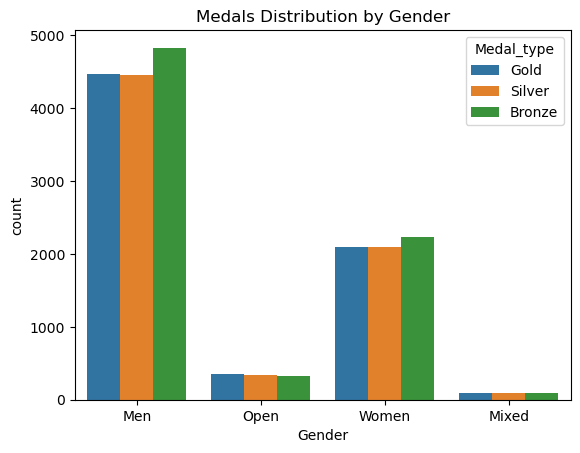

In [10]:
sns.countplot(x='Gender', hue='Medal_type', data=data)
plt.title("Medals Distribution by Gender")
plt.show()


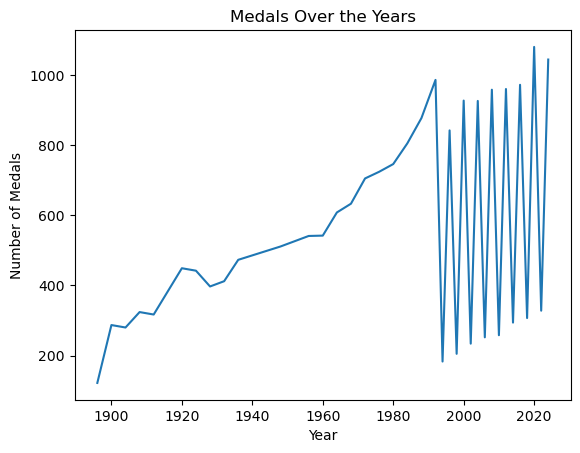

In [11]:
medals_by_year = data.groupby('Olympic_year')['Medal_type'].count()
medals_by_year.plot(kind='line')
plt.title("Medals Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.show()


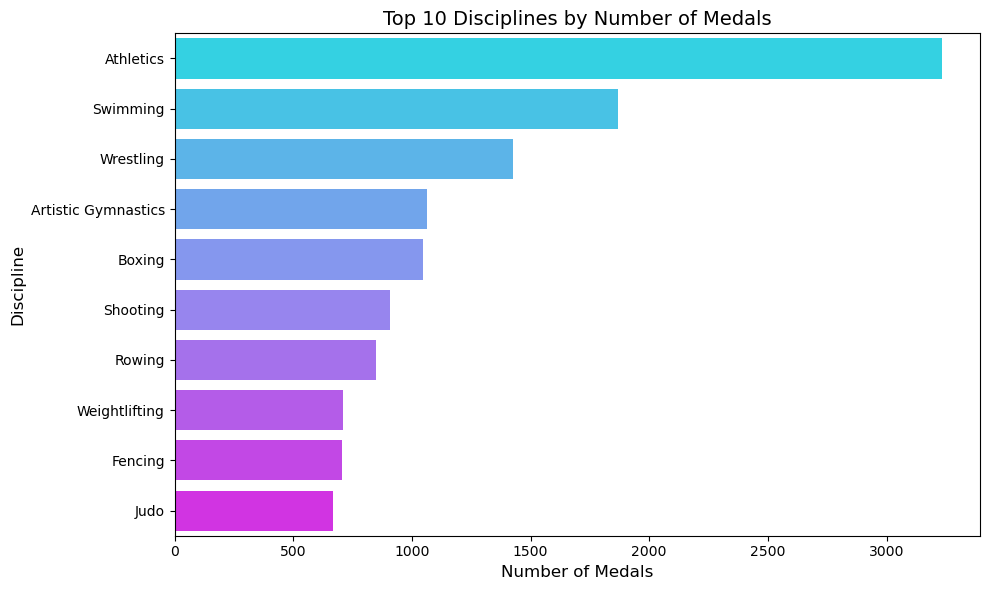

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("olympic_medals.csv")

# Top 10 Disciplines (Sports) by Medal Count
sport_medals = df['Discipline'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    y=sport_medals.index,
    x=sport_medals.values,
    hue=sport_medals.index,      # add hue to satisfy new seaborn version
    dodge=False,
    legend=False,
    palette="cool"
)

plt.title("Top 10 Disciplines by Number of Medals", fontsize=14)
plt.xlabel("Number of Medals", fontsize=12)
plt.ylabel("Discipline", fontsize=12)
plt.tight_layout()
plt.show()



In [21]:
summary = data.groupby(['Medal_type', 'Gender'])['Medal_type'].count().unstack()
print(summary.head(10))


Gender       Men  Mixed  Open  Women
Medal_type                          
Bronze      4830     99   327   2234
Gold        4464     97   348   2099
Silver      4451     96   338   2094
